In [120]:
import pandas as pd
from pandas import Grouper
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import datetime as dt
import matplotlib.cm as cm
import seaborn as sns

In [83]:
#Carga y configuración de dataset de Google
google_df = pd.read_csv('historicos/Global_Mobility_Report.csv', low_memory=False,sep = ',',header=0, parse_dates=[4], squeeze=True)
google_df_mad=google_df[google_df['sub_region_1']=='Community of Madrid']
df_transit_indicator = google_df_mad.drop(['sub_region_1','country_region_code','country_region','sub_region_2'],axis=1)
df_transit_indicator=df_transit_indicator.set_index(['date'])
df_transit_indicator.index = df_transit_indicator.index.to_period("D")
df_transit_indicator.index = df_transit_indicator.index.to_timestamp()
df_transit_indicator.columns = ['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces','residential']


,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
2020-02-15,-1.0,-2.0,31.0,7.0,-1.0,-2.0
2020-02-16,3.0,4.0,34.0,4.0,0.0,-2.0
2020-02-17,1.0,3.0,10.0,4.0,4.0,-1.0
2020-02-18,-1.0,1.0,11.0,4.0,4.0,-1.0
2020-02-19,-1.0,1.0,18.0,2.0,4.0,-1.0
...,...,...,...,...,...,...
2020-05-25,-54.0,-18.0,0.0,-53.0,-58.0,21.0
2020-05-26,-57.0,-17.0,8.0,-54.0,-57.0,21.0
2020-05-27,-57.0,-17.0,10.0,-54.0,-56.0,22.0


In [85]:
#Carga y configuración de dataset de tráfico
df = pd.read_csv('serie_temporal_interpolada.csv', sep = ',',header=0, parse_dates=[0], index_col=0, squeeze=True)
df.index = df.index.to_period("H")
df_daily = df.groupby(Grouper(freq='D')).mean()
df_daily=df_daily.drop(['year','month','day','hour','week_day','no2_lvl','temperatura','precipitation'],axis=1)
df_daily.index.name = 'date'
df_daily.index = df_daily.index.to_timestamp()
#desde 15/2
df_daily=df_daily[14:]
df_daily

,intensity,velocity,occupation,conf_lvl
date,,,,
2020-02-15,2259.427083,78.385417,3.583333,0.0
2020-02-16,2060.947917,78.927083,3.239583,0.0
2020-02-17,2847.197917,69.885417,9.614583,0.0
2020-02-18,2713.114583,67.281250,11.270833,0.0
2020-02-19,2669.604167,65.375000,12.583333,0.0
...,...,...,...,...
2020-05-27,2040.325758,79.417677,3.142361,6.0
2020-05-28,2075.185606,78.628030,3.275568,6.0
2020-05-29,2057.102273,79.082386,3.166667,6.0


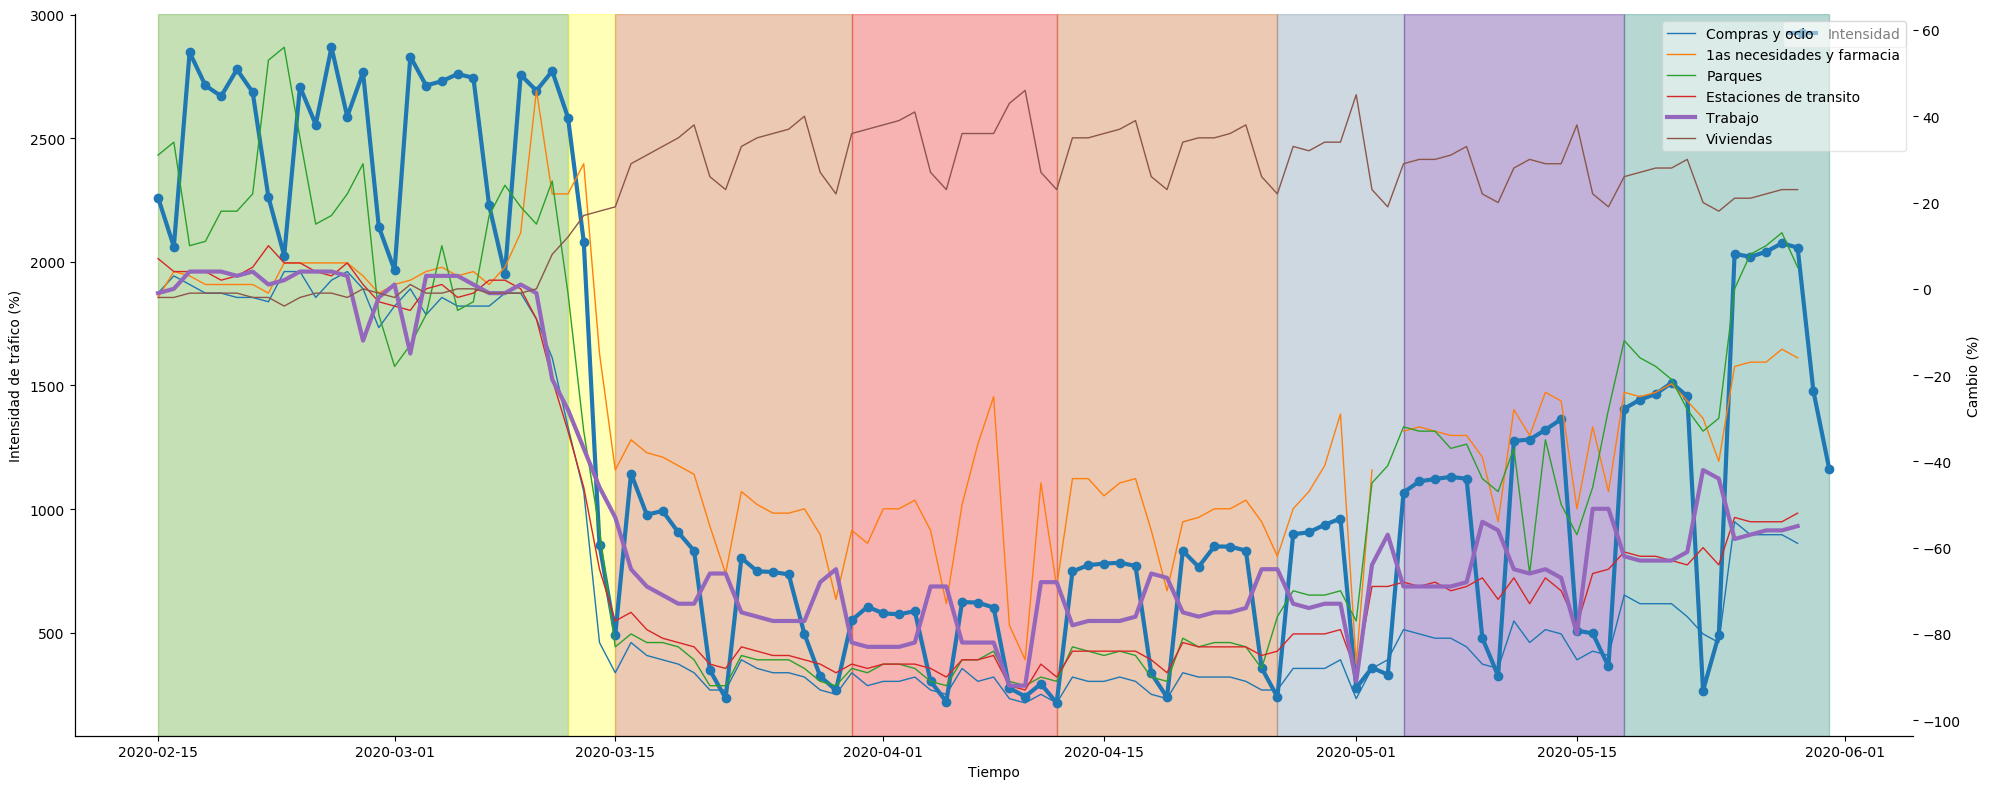

In [125]:
#Plot de intensidad de tráfico con respecto a los diferentes indicadores de movilidad
pd.plotting.register_matplotlib_converters()

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Intensidad de tráfico media')
ax1.plot(df_daily.index.values,df_daily['intensity'],'o-',label='Intensidad',linewidth=3)


ax2 = ax1.twinx()

# instantiate a second axes that shares the same x-axis
#retail_and_recreation
ax2.plot(df_transit_indicator.index.values, df_transit_indicator['retail_and_recreation'],label='Compras y ocio',linewidth=1)

#grocery_and_pharmacy
ax2.plot(df_transit_indicator.index.values, df_transit_indicator['grocery_and_pharmacy'],label='1as necesidades y farmacia',linewidth=1)

#parks
ax2.plot(df_transit_indicator.index.values, df_transit_indicator['parks'],label='Parques',linewidth=1)

#transit_stations
ax2.plot(df_transit_indicator.index.values, df_transit_indicator['transit_stations'],label='Estaciones de transito',linewidth=1)

#workplaces
ax2.plot(df_transit_indicator.index.values, df_transit_indicator['workplaces'],label='Trabajo',linewidth=3)

#residential
ax2.plot(df_transit_indicator.index.values, df_transit_indicator['residential'],label='Viviendas',linewidth=1)

ax1.set_ylabel('Intensidad de tráfico (%)')  # we already handled the x-label with ax1
ax1.tick_params(axis='y')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(fancybox=True, framealpha=0.5)

ax2.set_ylabel('Cambio (%)')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(fancybox=True, framealpha=0.5)



conf0 =  dt.datetime(2020, 2, 15)
conf1 = dt.datetime(2020, 3, 12)
conf2 = dt.datetime(2020, 3, 15)
conf3 = dt.datetime(2020, 3, 30)
conf4 = dt.datetime(2020, 4, 12)
conf5 = dt.datetime(2020, 4, 26)
conf6 = dt.datetime(2020, 5, 4)
conf7 = dt.datetime(2020, 5, 18)
conf8 = dt.datetime(2020, 5, 31)

ax1.axvspan(conf0, conf1, color=sns.xkcd_rgb['grass green'], alpha=0.3)
ax1.axvspan(conf1, conf2, color=sns.xkcd_rgb['yellow'], alpha=0.3)
ax1.axvspan(conf2, conf3, color=sns.xkcd_rgb['burnt orange'], alpha=0.3)
ax1.axvspan(conf3, conf4, color=sns.xkcd_rgb['red'], alpha=0.3)
ax1.axvspan(conf4, conf5, color=sns.xkcd_rgb['burnt orange'], alpha=0.3)
ax1.axvspan(conf5, conf6, color=sns.xkcd_rgb['greyish blue'], alpha=0.3)
ax1.axvspan(conf6, conf7, color=sns.xkcd_rgb['indigo'], alpha=0.3)
ax1.axvspan(conf7,conf8, color=sns.xkcd_rgb['blue green'], alpha=0.3)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Correlacion

In [145]:
intensity = df_daily['intensity'][:-2]

In [146]:
intensity.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
               '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29'],
              dtype='datetime64[ns]', name='date', length=105, freq='D')

In [142]:
df_transit_indicator.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
               '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29'],
              dtype='datetime64[ns]', name='date', length=105, freq='D')

In [184]:
C_intensity1 = intensity.loc[conf2:conf3]
C_intensity2 = intensity.loc[conf4:conf5]
C_intensity = C_intensity1.append(C_intensity2)

C_df_transit_indicator1 = df_transit_indicator.loc[conf2:conf3]
C_df_transit_indicator2 = df_transit_indicator.loc[conf4:conf5]
C_df_transit_indicator = C_df_transit_indicator1.append(C_df_transit_indicator2)

In [185]:
total_corr = pd.concat([intensity,df_transit_indicator],axis=1).corr(method="pearson")
A_corr=pd.concat([intensity.loc[conf0:conf1],df_transit_indicator.loc[conf0:conf1]],axis=1).corr(method="pearson")
B_corr = pd.concat([intensity.loc[conf1:conf2],df_transit_indicator.loc[conf1:conf2]],axis=1).corr(method="pearson")
C_corr=pd.concat([C_intensity,C_df_transit_indicator],axis=1).corr(method="pearson")
D_corr = pd.concat([intensity.loc[conf3:conf4],df_transit_indicator.loc[conf3:conf4]],axis=1).corr(method="pearson")
E_corr = pd.concat([intensity.loc[conf5:conf6],df_transit_indicator.loc[conf5:conf6]],axis=1).corr(method="pearson")
F_corr = pd.concat([intensity.loc[conf6:conf7],df_transit_indicator.loc[conf6:conf7]],axis=1).corr(method="pearson")
G_corr = pd.concat([intensity.loc[conf7:],df_transit_indicator.loc[conf7:]],axis=1).corr(method="pearson")

In [205]:
mc = pd.concat([A_corr['intensity'],B_corr['intensity'],C_corr['intensity'],D_corr['intensity'],E_corr['intensity'],F_corr['intensity'],G_corr['intensity'],total_corr['intensity']],axis=1)
mc.columns = ['A','B','C','D','E','F','G','All']
mc=mc[1:]

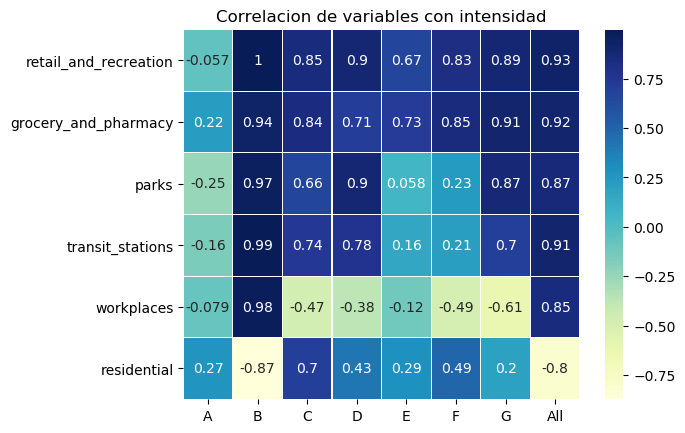

In [206]:
f,ax = plt.subplots()
ax.set_title('Correlacion de variables con intensidad')
sns.heatmap(mc,annot=True,ax=ax, cmap ="YlGnBu", linewidths = 0.1)

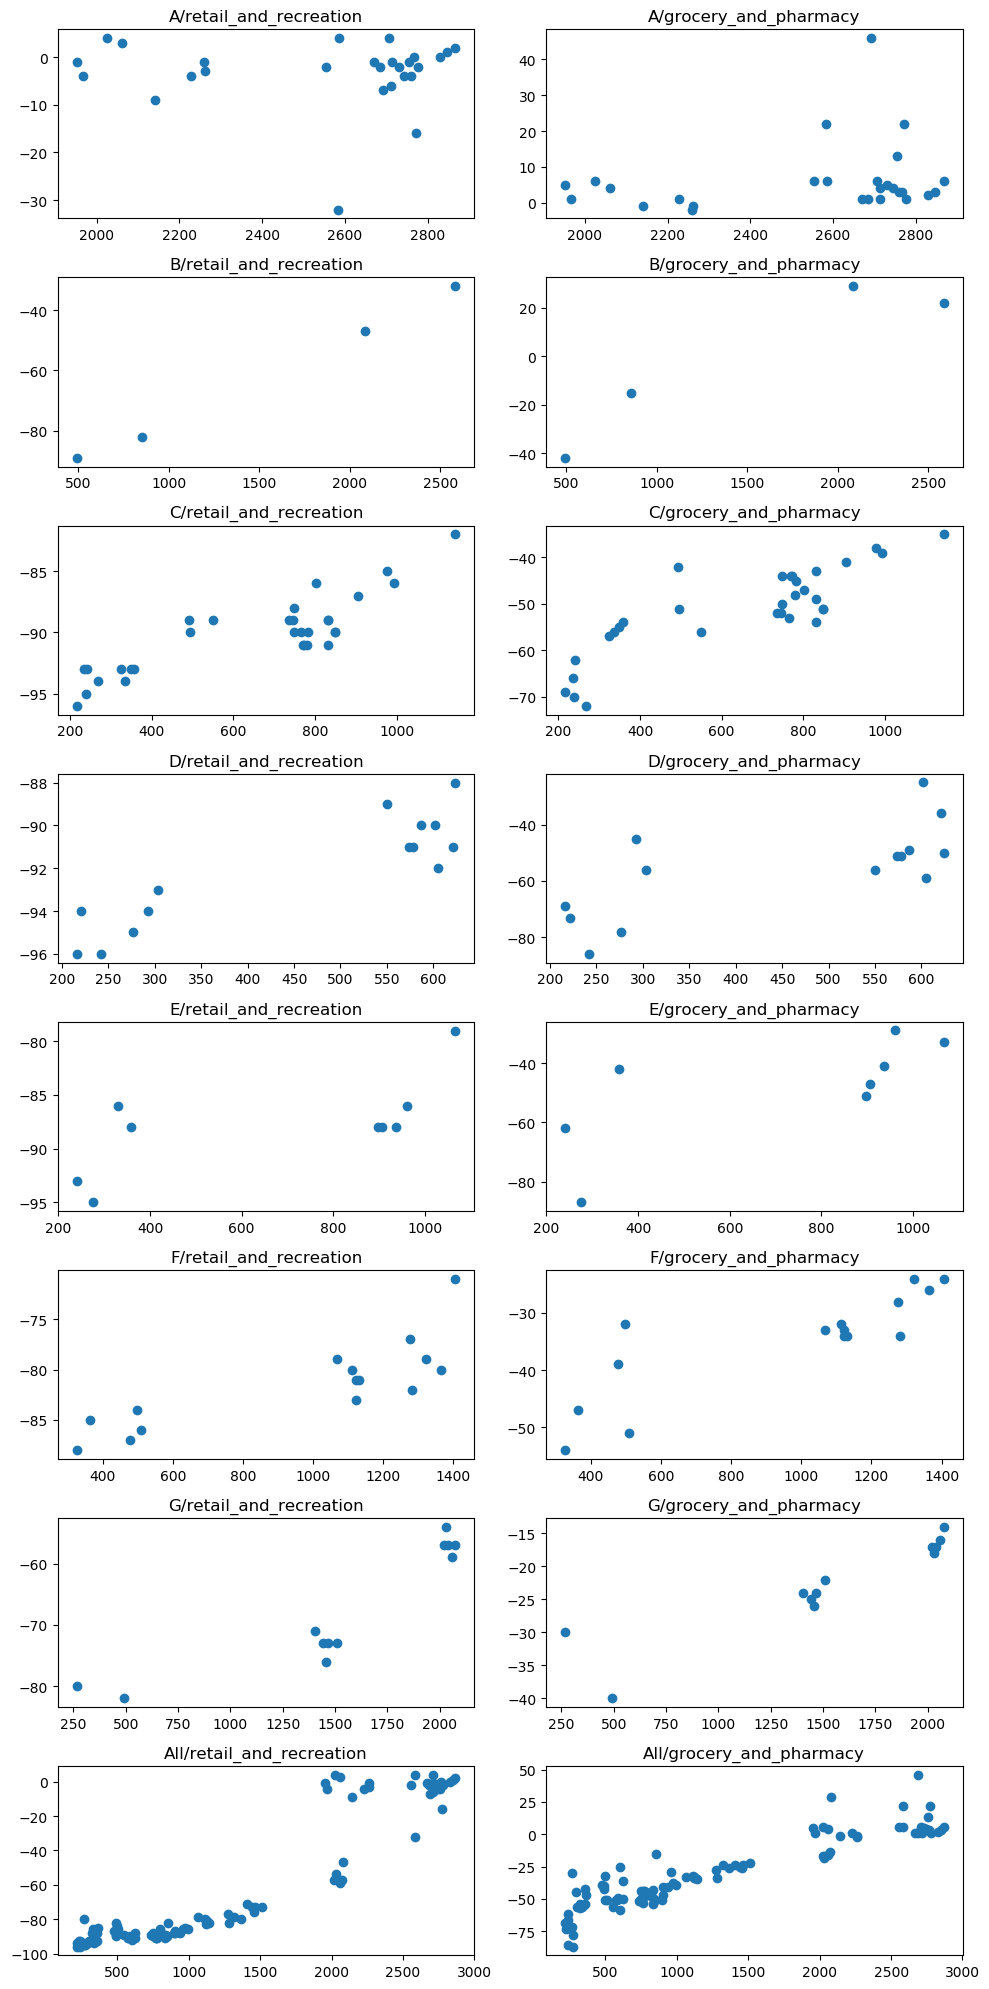

In [224]:
f,([ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8],[ax9,ax10],[ax11,ax12],[ax13,ax14],[ax15,ax16])=plt.subplots(8,2,figsize=(10,20))
#Fase A
ax1.set_title('A/retail_and_recreation')
ax1.scatter(intensity.loc[conf0:conf1],df_transit_indicator['retail_and_recreation'].loc[conf0:conf1])
ax2.set_title('A/grocery_and_pharmacy')
ax2.scatter(intensity.loc[conf0:conf1],df_transit_indicator['grocery_and_pharmacy'].loc[conf0:conf1])

   #Fase B
ax3.set_title('B/retail_and_recreation')
ax3.scatter(intensity.loc[conf1:conf2],df_transit_indicator['retail_and_recreation'].loc[conf1:conf2])
ax4.set_title('B/grocery_and_pharmacy')
ax4.scatter(intensity.loc[conf1:conf2],df_transit_indicator['grocery_and_pharmacy'].loc[conf1:conf2])

   
   #Fase C
ax5.set_title('C/retail_and_recreation')
ax5.scatter(C_intensity,C_df_transit_indicator['retail_and_recreation'])
ax6.set_title('C/grocery_and_pharmacy')
ax6.scatter(C_intensity,C_df_transit_indicator['grocery_and_pharmacy'])

   
ax7.set_title('D/retail_and_recreation')
ax7.scatter(intensity.loc[conf3:conf4],df_transit_indicator['retail_and_recreation'].loc[conf3:conf4])
ax8.set_title('D/grocery_and_pharmacy')
ax8.scatter(intensity.loc[conf3:conf4],df_transit_indicator['grocery_and_pharmacy'].loc[conf3:conf4])

   
   #Fase E
ax9.set_title('E/retail_and_recreation')
ax9.scatter(intensity.loc[conf5:conf6],df_transit_indicator['retail_and_recreation'].loc[conf5:conf6])
ax10.set_title('E/grocery_and_pharmacy')
ax10.scatter(intensity.loc[conf5:conf6],df_transit_indicator['grocery_and_pharmacy'].loc[conf5:conf6])

   
   #Fase F
ax11.set_title('F/retail_and_recreation')
ax11.scatter(intensity.loc[conf6:conf7],df_transit_indicator['retail_and_recreation'].loc[conf6:conf7])
ax12.set_title('F/grocery_and_pharmacy')
ax12.scatter(intensity.loc[conf6:conf7],df_transit_indicator['grocery_and_pharmacy'].loc[conf6:conf7])

   
   #Fase G
ax13.set_title('G/retail_and_recreation')
ax13.scatter(intensity.loc[conf7:],df_transit_indicator['retail_and_recreation'].loc[conf7:])
ax14.set_title('G/grocery_and_pharmacy')
ax14.scatter(intensity.loc[conf7:],df_transit_indicator['grocery_and_pharmacy'].loc[conf7:])

#All
ax15.set_title('All/retail_and_recreation')
ax15.scatter(intensity,df_transit_indicator['retail_and_recreation'])
ax16.set_title('All/grocery_and_pharmacy')
ax16.scatter(intensity,df_transit_indicator['grocery_and_pharmacy'])
f.tight_layout()